Datasets:<br>
Coral Bleaching https://www.bco-dmo.org/dataset/773466<br>
Temperatures https://climateknowledgeportal.worldbank.org/download-data<br>
Co2 Emissions per Country https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions<br>
Population data: https://datahub.io/JohnSnowLabs/population-figures-by-country

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import folium
import plotly.express as px
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
import statsmodels.api as sm
from matplotlib import pylab
from pylab import *
from sklearn.linear_model import LinearRegression

<h2>Coral bleaching</h2>

In [2]:
#Importing an cleaning the coral dataset
df = pd.read_csv('bcodmo_dataset_773466_712b_5843_9069.csv')

In [3]:
df.head()

,ID,latitude,longitude,Ocean,Realm,Ecoregion,Country_Name,State_Island_Province,City_Town,City_Town_2,...,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
0,unitless,degrees_north,degrees_east,unitless,unitless,unitless,unitless,unitless,unitless,unitless,...,Degree Celsius,Degree Celsius,TSA per time period,TSA per time period,TSA per time period,TSA per time period,Weeks,Weeks,Weeks,Weeks
1,97,-20.89983333,149.4077222,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,Queensland,Keswick Island,NaN,...,2.4,-3.26,3.0,1.95,7.0,1.0,3.52,1.36,8.43,0.52
2,98,-20.89305556,149.421,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,Queensland,Keswick Island,NaN,...,2.4,-3.26,3.0,1.95,7.0,1.0,3.52,1.36,8.43,0.52
3,116,-20.74580556,149.4720556,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,Queensland,Wigton Island,Wigton Island Reef,...,2.34,-3.06,1.0,1.47,5.0,1.0,1.51,1.23,7.32,0.49
4,117,-20.73769444,149.4649444,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,Queensland,Wigton Island,Wigton Island Reef,...,2.64,-3.01,2.0,1.31,5.0,1.0,2.36,0.97,6.86,0.36


In [4]:
#Missing values
df.isnull().sum()

ID                                          0
latitude                                    0
longitude                                   0
Ocean                                       0
Realm                                       0
Ecoregion                                   0
Country_Name                                0
State_Island_Province                      36
City_Town                                 437
City_Town_2                              4943
City_Town_3                              8728
Date                                        0
Date2                                       0
depth                                       0
Average_Bleaching                           0
ClimSST                                     3
Temperature_Kelvin                          5
Temperature_Mean                            5
Temperature_Minimum                         5
Temperature_Maximum                         5
Temperature_Kelvin_Standard_Deviation       5
Windspeed                         

In [5]:
df.shape

(9666, 48)

In [6]:
print(df.columns)

Index(['ID', 'latitude', 'longitude', 'Ocean', 'Realm', 'Ecoregion',
       'Country_Name', 'State_Island_Province', 'City_Town', 'City_Town_2',
       'City_Town_3', 'Date', 'Date2', 'depth', 'Average_Bleaching', 'ClimSST',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
       'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean',
       'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
       'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
       'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation',
       'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation',
       'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency',
       'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean'],
      dtype='object')


In [7]:
#Dropping unnecessary columns ; Temperature data for example is not usable
cols_to_drop = ['ID', 'latitude', 'longitude','City_Town', 'City_Town_2',
       'City_Town_3','ClimSST',
       'Temperature_Kelvin', 'State_Island_Province','Date2','Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
       'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean',
       'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
       'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
       'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation',
       'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation',
       'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency',
       'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean']

df.drop(cols_to_drop, inplace=True, axis=1)

In [8]:
df.head(3)

,Ocean,Realm,Ecoregion,Country_Name,Date,depth,Average_Bleaching
0,unitless,unitless,unitless,unitless,unitless,m,percent
1,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,3/26/2016,4.0,6.25
2,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,3/26/2016,5.0,8.75


In [9]:
df = df.iloc[1:]

In [10]:
df.dtypes

Ocean                object
Realm                object
Ecoregion            object
Country_Name         object
Date                 object
depth                object
Average_Bleaching    object
dtype: object

In [11]:
#Changing date to year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
df['Year'] = df['Date'].dt.year

In [13]:
df.head(3)

,Ocean,Realm,Ecoregion,Country_Name,Date,depth,Average_Bleaching,Year
1,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,2016-03-26,4.0,6.25,2016
2,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,2016-03-26,5.0,8.75,2016
3,Pacific,Central Indo-Pacific,Southern Great Barrier Reef,Australia,2016-03-27,6.0,11.25,2016


In [14]:
#Counting datapoints per country
df['Country_Name'].value_counts(sort=True)[:5]

Malaysia            1560
Australia            853
Philippines          806
French Polynesia     567
Indonesia            563
Name: Country_Name, dtype: int64

In [15]:
#Choosing the countries with the most data
df = df[df['Country_Name'].isin(['Malaysia','Australia','Philippines','French Polynesia','Indonesia'])]

In [16]:
df.groupby(by='Country_Name').count()

,Ocean,Realm,Ecoregion,Date,depth,Average_Bleaching,Year
Country_Name,,,,,,,
Australia,853,853,853,853,853,853,853
French Polynesia,567,567,567,567,567,567,567
Indonesia,563,563,563,563,563,563,563
Malaysia,1560,1560,1560,1560,1560,1560,1560
Philippines,806,806,806,806,806,806,806


In [17]:
df = df.sort_values('Year', ascending=True)

In [18]:
df.dtypes

Ocean                        object
Realm                        object
Ecoregion                    object
Country_Name                 object
Date                 datetime64[ns]
depth                        object
Average_Bleaching            object
Year                          int64
dtype: object

In [19]:
df.head()

,Ocean,Realm,Ecoregion,Country_Name,Date,depth,Average_Bleaching,Year
1268,Indian,Central Indo-Pacific,"Cocos Keeling Atolls, Indian Ocean",Australia,1998-08-23,10.0,8.75,1998
8023,Pacific,Central Indo-Pacific,Sulu Sea,Philippines,1998-08-29,3.0,1.0,1998
3485,Pacific,Eastern Indo-Pacific,"Society Islands, French Polynesia",French Polynesia,2000-08-26,2.0,5.0,2000
3507,Pacific,Eastern Indo-Pacific,"Society Islands, French Polynesia",French Polynesia,2000-06-21,2.0,0.0,2000
3625,Pacific,Eastern Indo-Pacific,"Society Islands, French Polynesia",French Polynesia,2001-08-19,1.5,0.0,2001


In [20]:
#Renaming columns
df = df.rename(columns={"Country_Name": "Country", "depth": "Depth_m", "Average_Bleaching": "Average_Bleaching_percent"})

In [21]:
df.shape

(4349, 8)

In [22]:
#Rearranging the dataset
df = df[['Year','Date', 'Country', 'Average_Bleaching_percent', 'Depth_m', 'Realm', 'Ocean', 'Ecoregion']]

In [23]:
df.sort_values(by=['Year','Country'])

,Year,Date,Country,Average_Bleaching_percent,Depth_m,Realm,Ocean,Ecoregion
1268,1998,1998-08-23,Australia,8.75,10.0,Central Indo-Pacific,Indian,"Cocos Keeling Atolls, Indian Ocean"
8023,1998,1998-08-29,Philippines,1.0,3.0,Central Indo-Pacific,Pacific,Sulu Sea
3485,2000,2000-08-26,French Polynesia,5.0,2.0,Eastern Indo-Pacific,Pacific,"Society Islands, French Polynesia"
3507,2000,2000-06-21,French Polynesia,0.0,2.0,Eastern Indo-Pacific,Pacific,"Society Islands, French Polynesia"
3625,2001,2001-08-19,French Polynesia,0.0,1.5,Eastern Indo-Pacific,Pacific,"Society Islands, French Polynesia"
...,...,...,...,...,...,...,...,...
7995,2017,2017-02-14,Philippines,0.0,5.0,Central Indo-Pacific,Pacific,South-east Philippines
7973,2017,2017-02-14,Philippines,0.0,7.0,Central Indo-Pacific,Pacific,South-east Philippines
7951,2017,2017-02-14,Philippines,0.0,6.0,Central Indo-Pacific,Pacific,South-east Philippines
7931,2017,2017-02-16,Philippines,0.0,6.0,Central Indo-Pacific,Pacific,South-east Philippines


In [24]:
df.reset_index(inplace=True, drop=True)

In [25]:
df.groupby(['Year']).size()

Year
1998      2
2000      2
2001      3
2002     14
2003    194
2004    166
2005    255
2006    342
2007    242
2008    243
2009    270
2010    221
2011    174
2012    263
2013    358
2014    364
2015    421
2016    438
2017    377
dtype: int64

In [26]:
#Not enough data before 2003, so setting the dataset to start from there
df = df[df['Year'] > 2002]

In [27]:
df.head()

,Year,Date,Country,Average_Bleaching_percent,Depth_m,Realm,Ocean,Ecoregion
21,2003,2003-03-11,French Polynesia,0.0,0.8,Eastern Indo-Pacific,Pacific,"Society Islands, French Polynesia"
22,2003,2003-08-18,Indonesia,0.0,5.0,Central Indo-Pacific,Pacific,Banda Sea and Molucca Islands
23,2003,2003-06-10,Indonesia,0.0,10.0,Central Indo-Pacific,Pacific,Banda Sea and Molucca Islands
24,2003,2003-09-02,Indonesia,0.0,5.0,Central Indo-Pacific,Pacific,Banda Sea and Molucca Islands
25,2003,2003-11-17,Philippines,0.0,12.0,Central Indo-Pacific,Pacific,South-east Philippines


In [28]:
print(df.groupby(['Year', 'Country']).size())

Year  Country         
2003  Australia            35
      French Polynesia     19
      Indonesia            64
      Malaysia             31
      Philippines          45
                         ... 
2017  Australia            86
      French Polynesia     27
      Indonesia            75
      Malaysia            174
      Philippines          15
Length: 75, dtype: int64


In [29]:
#Transforming column datatypes
df['Depth_m'] = pd.to_numeric(df['Depth_m'],errors='coerce')
df['Average_Bleaching_percent'] = pd.to_numeric(df['Average_Bleaching_percent'],errors='coerce')

In [30]:
df.dtypes

Year                                  int64
Date                         datetime64[ns]
Country                              object
Average_Bleaching_percent           float64
Depth_m                             float64
Realm                                object
Ocean                                object
Ecoregion                            object
dtype: object

<AxesSubplot:xlabel='Year'>

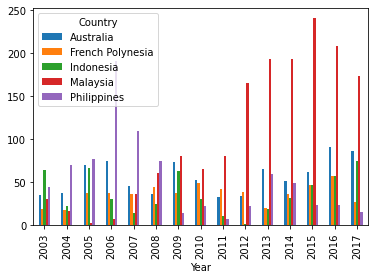

In [31]:
#Vizualising the amount of data per country per year
df.groupby('Country').Year.value_counts().unstack(0).plot.bar()

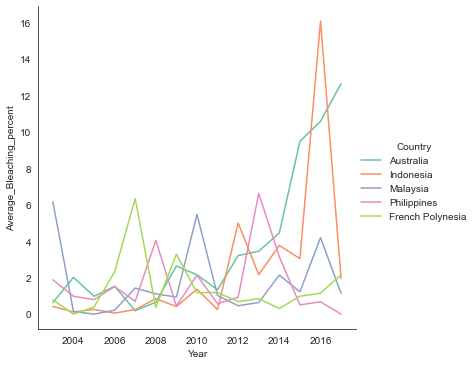

In [32]:
#Visualizing the bleaching per country per year
df=df.sort_values("Average_Bleaching_percent",ascending=False)
sns.set_palette("Set2")
sns.set_style("white")
ax = sns.relplot(x='Year', y='Average_Bleaching_percent', hue='Country',data=df, kind='line', ci=None)

In [33]:
#Creating a sub-dataframe
df_ = pd.DataFrame
df_ = df.groupby('Country')['Average_Bleaching_percent'].mean().reset_index()

In [34]:
df_=pd.DataFrame(df_)

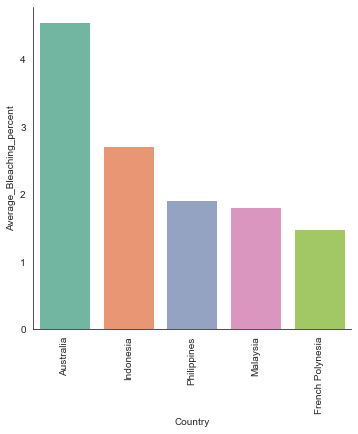

In [35]:
#Visualizing the average bleaching % per country between 2003 and 2017
df_=df_.sort_values("Average_Bleaching_percent",ascending=False)
ax = sns.catplot(x="Country", y="Average_Bleaching_percent", kind="bar", data=df_)
sns.set_palette("Set2")
sns.set_style("white")
ax.set_xticklabels(rotation=90)

In [36]:
df.groupby(['Country'])[['Average_Bleaching_percent']].mean()

,Average_Bleaching_percent
Country,
Australia,4.547518
French Polynesia,1.491818
Indonesia,2.713819
Malaysia,1.806747
Philippines,1.917025


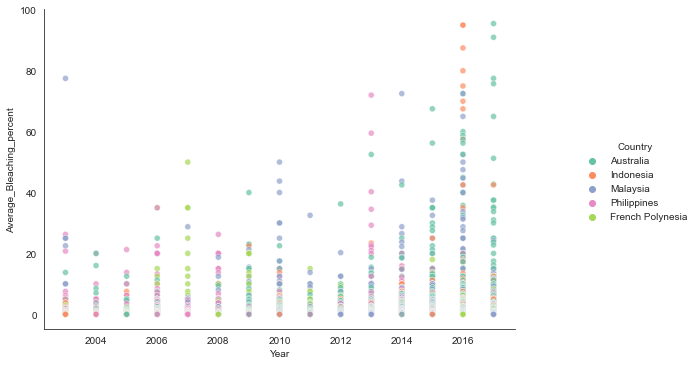

In [37]:
#Scatterplot of the avg bleaching percentages
ax = sns.relplot(x='Year', y='Average_Bleaching_percent', hue='Country', kind='scatter', data=df, alpha=0.7)
ax.fig.set_size_inches(10,5)

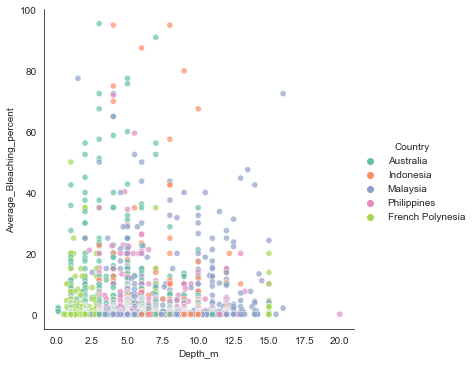

In [38]:
#Depth vs bleaching; no relationship
ax = sns.relplot(x='Depth_m', y='Average_Bleaching_percent', hue='Country', kind='scatter', data=df, alpha=0.7)

In [39]:
print(scipy.stats.pearsonr(df['Depth_m'], df['Average_Bleaching_percent']))
print(scipy.stats.spearmanr(df['Depth_m'], df['Average_Bleaching_percent']))

(-0.04058278809044131, 0.007581275421396876)
SpearmanrResult(correlation=-0.03713691815223141, pvalue=0.014554302268020783)


<h2>Bleaching events on map</h2>

In [40]:
df_fol = pd.read_csv('bcodmo_dataset_773466_712b_5843_9069.csv')

In [41]:
cols_to_drop = ['ID','City_Town', 'City_Town_2',
       'City_Town_3','ClimSST',
       'Temperature_Kelvin', 'State_Island_Province','Date2','Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
       'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean',
       'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
       'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
       'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation',
       'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation',
       'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency',
       'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean']

df_fol.drop(cols_to_drop, inplace=True, axis=1)

In [42]:
df_fol['Country_Name'].unique()

array(['unitless', 'Australia', 'Cook Islands', 'Fiji',
       'French Polynesia', 'Madagascar', 'Solomon Islands', 'Indonesia',
       'East Timor', 'Brazil', 'Malaysia', 'Maldives', 'Cambodia',
       'Philippines',
       'Commonwealth of the Northern Mariana Islands (CNMI)', 'Jamaica',
       'Haiti', 'Dominican Republic', 'United States', 'Taiwan', 'China',
       'Antigua', 'Bahamas', 'Bangladesh', 'Barbados', 'Barbuda',
       'Belize', 'British Virgin Islands', 'Brunei', 'Colombia',
       'Commonwealth of the Northern Mariana Islands', 'Costa Rica',
       'Cuba', 'Djibouti', 'Dominica', 'Egypt',
       'Federated States of Micronesia', 'France', 'Grenada', 'Guatemala',
       'Honduras', 'India', 'Iran', 'Japan', 'Jordan', 'Kenya',
       'Kiribati', 'Kuwait', 'Martinique', 'Mauritius', 'Mexico',
       'Montserrat', 'Mozambique', 'Myanmar', 'Netherlands Antilles',
       'New Caledonia', 'Oman', 'Palau', 'Panama', 'Papua New Guinea',
       'Puerto Rico', 'Sao Tome & Princip

In [47]:
df_fol.drop(df_fol.index[0],inplace=True)

In [48]:
df_fol.dtypes

latitude             object
longitude            object
Ocean                object
Realm                object
Ecoregion            object
Country_Name         object
Date                 object
depth                object
Average_Bleaching    object
dtype: object

In [49]:
df_fol['latitude']

1       -20.89983333
2       -20.89305556
3       -20.74580556
4       -20.73769444
5       -20.25936111
            ...     
9661     13.93588889
9662     13.93588889
9663     14.81772222
9664     15.70161111
9665     15.70161111
Name: latitude, Length: 9665, dtype: object

In [50]:
df_fol[['latitude','longitude']]=df_fol[['latitude','longitude']].apply(pd.to_numeric)

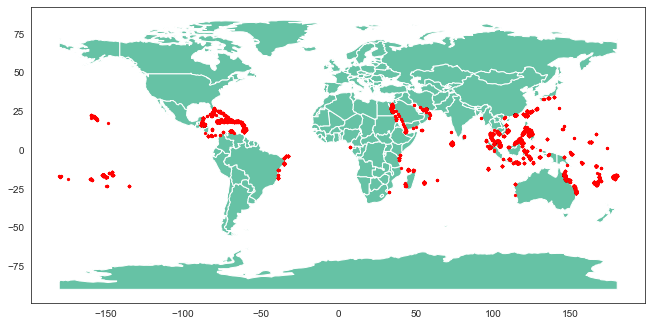

In [51]:
#Decided to make a map based on the coordinates of the bleaching events instead;
#Used help from https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
geometry = [Point(xy) for xy in zip(df_fol['longitude'], df_fol['latitude'])]
gdf = GeoDataFrame(df_fol, geometry=geometry)   

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world_map.plot(figsize=(11, 7)), marker='.', color='red', markersize=20);

In [52]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<h2>Co2</h2>

In [53]:
#Importing and cleaning co2 data for the countries
co2_df = pd.read_excel('owid-co2-data.xlsx')

In [54]:
co2_df.head(3)

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10


In [55]:
print(co2_df.columns)

Index(['iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share',
       'co2_per_capita', 'consumption_co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'consumption_co2_per_gdp', 'co2_per_unit_energy', 'cement_co2',
       'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')


In [56]:
#Dropping the unnecessary columns
cols_to_drop = ['iso_code','co2_growth_prct',
       'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share',
       'co2_per_capita', 'consumption_co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'consumption_co2_per_gdp', 'co2_per_unit_energy', 'cement_co2',
       'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp']

co2_df.drop(cols_to_drop, inplace=True, axis=1)

In [57]:
co2_df['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctic Fisheries', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (excl. China & India)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican R

In [58]:
#Excluding the other countries we're not interested in
co2_df = co2_df[co2_df['country'].isin(['Malaysia','Australia','Philippines','French Polynesia','Indonesia'])]

In [59]:
co2_df = co2_df[(co2_df['year'] > 1900) & (co2_df['year'] < 2018)]

In [60]:
co2_df['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [61]:
co2_df.isnull().sum()

country    0
year       0
co2        0
dtype: int64

In [62]:
co2_df.shape

(522, 3)

In [63]:
co2_df.reset_index(inplace=True, drop=True)

In [64]:
co2_df = co2_df.rename(columns={"country": "Country", "year": "Year", "co2": "Co2"})

In [65]:
co2_df.head(10)

,Country,Year,Co2
0,Australia,1901,11.439
1,Australia,1902,11.395
2,Australia,1903,11.219
3,Australia,1904,11.545
4,Australia,1905,12.047
5,Australia,1906,14.359
6,Australia,1907,15.477
7,Australia,1908,16.755
8,Australia,1909,14.553
9,Australia,1910,17.437


In [66]:
co2_df.groupby(['Country','Year'], axis='columns')

In [67]:
co2_test = co2_df.copy()

In [68]:
co2_test.head()

,Country,Year,Co2
0,Australia,1901,11.439
1,Australia,1902,11.395
2,Australia,1903,11.219
3,Australia,1904,11.545
4,Australia,1905,12.047


In [69]:
co2_plot = co2_test.set_index('Year')

<AxesSubplot:xlabel='Year', ylabel='Co2'>

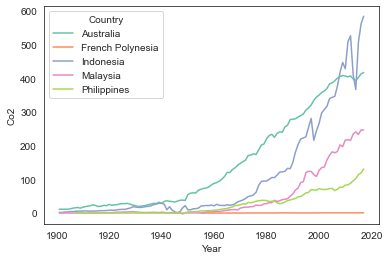

In [70]:
#Visualizing co2 change between 5 countries from 1901->
sns.set_style("white")

sns.lineplot(x='Year',y='Co2', hue='Country', data=co2_df,palette='Set2')

<h2>Temperatures 1901-2016</h2>

In [71]:
#Importing and cleaning temperature datasets for each country
temp_Au = pd.read_csv('tas_1901_2016_AUS.csv',sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
temp_Ma = pd.read_csv('tas_1901_2016_MYS.csv',sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
temp_In = pd.read_csv('tas_1901_2016_IDN.csv',sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [72]:
temp_Au.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,27.7179,1901,Jan Average,Australia,AUS
1,27.3591,1901,Feb Average,Australia,AUS
2,24.6881,1901,Mar Average,Australia,AUS
3,21.3057,1901,Apr Average,Australia,AUS
4,17.8553,1901,May Average,Australia,AUS


In [73]:
temp_Ma.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,24.9034,1901,Jan Average,Malaysia,MYS
1,24.6155,1901,Feb Average,Malaysia,MYS
2,25.3411,1901,Mar Average,Malaysia,MYS
3,25.6059,1901,Apr Average,Malaysia,MYS
4,26.0758,1901,May Average,Malaysia,MYS


In [74]:
temp_In.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,25.6515,1901,Jan Average,Indonesia,IDN
1,25.1426,1901,Feb Average,Indonesia,IDN
2,25.8091,1901,Mar Average,Indonesia,IDN
3,25.7992,1901,Apr Average,Indonesia,IDN
4,26.2116,1901,May Average,Indonesia,IDN


In [75]:
print(temp_Au.isnull().sum(),
temp_In.isnull().sum(),
temp_Ma.isnull().sum())

Temperature - (Celsius)    0
Year                       0
Statistics                 0
Country                    0
ISO3                       0
dtype: int64 Temperature - (Celsius)    0
Year                       0
Statistics                 0
Country                    0
ISO3                       0
dtype: int64 Temperature - (Celsius)    0
Year                       0
Statistics                 0
Country                    0
ISO3                       0
dtype: int64


In [76]:
#Modifying the datasets to contain avg temperatures per year
temp_Au['Au_avg_temp'] = temp_Au.groupby('Year')['Temperature - (Celsius)'].transform('mean')
temp_In['In_avg_temp'] = temp_In.groupby('Year')['Temperature - (Celsius)'].transform('mean')
temp_Ma['Ma_avg_temp'] = temp_Ma.groupby('Year')['Temperature - (Celsius)'].transform('mean')

In [77]:
temp_Au.dtypes

Temperature - (Celsius)    float64
Year                         int64
Statistics                  object
Country                     object
ISO3                        object
Au_avg_temp                float64
dtype: object

In [78]:
#Dropping the unnecessary columns
temp_Au.drop(['Statistics','Temperature - (Celsius)','ISO3','Country'], axis=1, inplace=True)
temp_Ma.drop(['Statistics','Temperature - (Celsius)','ISO3','Country'], axis=1, inplace=True)
temp_In.drop(['Statistics','Temperature - (Celsius)','ISO3','Country'], axis=1, inplace=True)

In [79]:
temp_Au = temp_Au.drop_duplicates('Year')
temp_Ma = temp_Ma.drop_duplicates('Year')
temp_In = temp_In.drop_duplicates('Year')

In [80]:
temp_Au['Year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [81]:
temp_merged = temp_Au.merge(temp_In.merge(temp_Ma, on='Year'), on='Year')

In [82]:
temp_merged.head()

,Year,Au_avg_temp,In_avg_temp,Ma_avg_temp
0,1901,21.455033,25.547325,25.183033
1,1902,21.469917,25.480767,25.073025
2,1903,21.027600,25.472267,24.828167
3,1904,20.896942,25.297275,24.538208
4,1905,21.026083,25.533400,25.098275


In [83]:
temp_melt = temp_merged.melt('Year',var_name='Country',value_name='Temp')

In [84]:
temp_melt50s = temp_melt[temp_melt['Year'] >= 1950]

<h2>Population</h2>

In [85]:
#Importing population data
pop_df = pd.read_csv("population-figures-by-country-csv_csv.csv")

In [86]:
pop_df.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [87]:
#Choosing the 3 countries
pop_countries = pop_df[pop_df['Country'].isin(['Malaysia','Australia','Indonesia'])]

In [88]:
pop_countries.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
11,Australia,AUS,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,11651000.0,11799000.0,...,20827600.0,21249200.0,21691700.0,22031750.0,22340024.0,22728254.0,23117353.0,23460694.0,23789338.0,24127159.0
104,Indonesia,IDN,87792515.0,90138235.0,92558005.0,95055665.0,97638029.0,100308894.0,103067354.0,105907403.0,...,232989141.0,236159276.0,239340478.0,242524123.0,245707511.0,248883232.0,252032263.0,255131116.0,258162113.0,261115456.0
166,Malaysia,MYS,8157106.0,8418460.0,8692815.0,8974084.0,9253963.0,9526563.0,9789982.0,10046172.0,...,26625845.0,27111069.0,27605383.0,28112289.0,28635128.0,29170456.0,29706724.0,30228017.0,30723155.0,31187265.0


In [89]:
#From here onwards just cleaning the df
pop_countries = pop_countries.drop(columns=['Country_Code'])

In [90]:
pop_countries.head()

,Country,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,Year_1968,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
11,Australia,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,11651000.0,11799000.0,12009000.0,...,20827600.0,21249200.0,21691700.0,22031750.0,22340024.0,22728254.0,23117353.0,23460694.0,23789338.0,24127159.0
104,Indonesia,87792515.0,90138235.0,92558005.0,95055665.0,97638029.0,100308894.0,103067354.0,105907403.0,108821564.0,...,232989141.0,236159276.0,239340478.0,242524123.0,245707511.0,248883232.0,252032263.0,255131116.0,258162113.0,261115456.0
166,Malaysia,8157106.0,8418460.0,8692815.0,8974084.0,9253963.0,9526563.0,9789982.0,10046172.0,10297801.0,...,26625845.0,27111069.0,27605383.0,28112289.0,28635128.0,29170456.0,29706724.0,30228017.0,30723155.0,31187265.0


In [91]:
pop_countries= pop_countries.transpose()

In [92]:
pop_countries.head()

,11,104,166
Country,Australia,Indonesia,Malaysia
Year_1960,10276477.0,87792515.0,8157106.0
Year_1961,10483000.0,90138235.0,8418460.0
Year_1962,10742000.0,92558005.0,8692815.0
Year_1963,10950000.0,95055665.0,8974084.0


In [93]:
pop_countries=pop_countries.reset_index()

In [94]:
pop_countries = pop_countries.iloc[1:]

In [95]:
pop_countries.head()

,index,11,104,166
1,Year_1960,10276477.0,87792515.0,8157106.0
2,Year_1961,10483000.0,90138235.0,8418460.0
3,Year_1962,10742000.0,92558005.0,8692815.0
4,Year_1963,10950000.0,95055665.0,8974084.0
5,Year_1964,11167000.0,97638029.0,9253963.0


In [96]:
#Renaming columns
pop_countries = pop_countries.rename(columns={"index": "Year", 11: "Australia", 104: "Indonesia", 166: "Malaysia"})

In [97]:
pop_countries['Year'] = pop_countries['Year'].str[-4:]

In [98]:
pop_countries.dtypes

Year         object
Australia    object
Indonesia    object
Malaysia     object
dtype: object

In [99]:
pop_countries=pop_countries.apply(pd.to_numeric)

In [100]:
pop_countries.dtypes

Year           int64
Australia    float64
Indonesia    float64
Malaysia     float64
dtype: object

In [101]:
#Happy with this dataframe
pop_countries.head()

,Year,Australia,Indonesia,Malaysia
1,1960,10276477.0,87792515.0,8157106.0
2,1961,10483000.0,90138235.0,8418460.0
3,1962,10742000.0,92558005.0,8692815.0
4,1963,10950000.0,95055665.0,8974084.0
5,1964,11167000.0,97638029.0,9253963.0


In [102]:
#Choosing just Australia for a sub-df
pop_au=pop_countries[['Year','Australia']]

<h2>CO2 and Temperatures</h2>

In [103]:
#Selecting the 3 countries we want to investigate
co2_m = co2_df[co2_df['Country'].isin(['Malaysia','Australia','Indonesia'])]

In [104]:
co2_m.head()

,Country,Year,Co2
0,Australia,1901,11.439
1,Australia,1902,11.395
2,Australia,1903,11.219
3,Australia,1904,11.545
4,Australia,1905,12.047


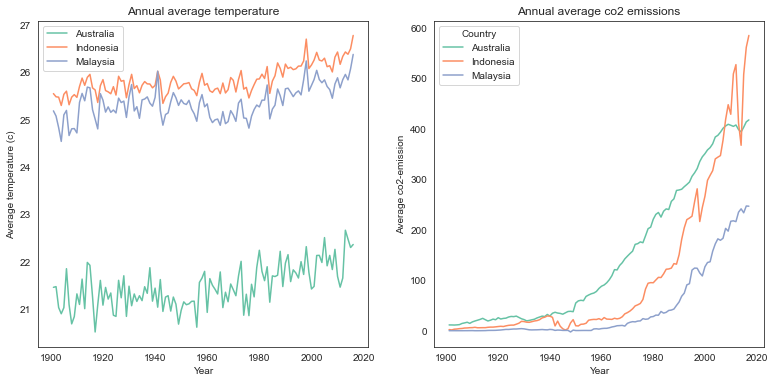

In [105]:
#Avg temp and avg CO2 emissions per country between 1901 and 2016
fig, ax = plt.subplots(1,2)
sns.lineplot(x="Year", y="Temp", hue='Country', data=temp_melt, ax=ax[0], palette='Set2')
sns.lineplot(x="Year", y="Co2", hue='Country', data=co2_m, ax=ax[1],palette='Set2')
sns.set_style('white')
fig.set_size_inches(13, 6);
ax[0].set_ylabel("Average temperature (c)")
ax[0].set_title("Annual average temperature")
ax[0].legend(labels=['Australia', 'Indonesia','Malaysia'])
ax[1].set_title("Annual average co2 emissions")
ax[1].set_ylabel("Average co2-emission");

In [106]:
#Counting the overall change
au_temp_change = temp_Au.iloc[-1,1] - temp_Au.iloc[0,1]
in_temp_change = temp_In.iloc[-1,1] - temp_In.iloc[0,1]
ma_temp_change = temp_Ma.iloc[-1,1] - temp_Ma.iloc[0,1]

In [107]:
print("Temperature change in Australia between 1901 and 2016 (+ degree celsius) ",au_temp_change, 
      "\nTemperature change in Indonesia between 1901 and 2016 (+ degree celsius) ",in_temp_change,
      "\nTemperature change in Malaysia between 1901 and 2016 (+ degree celsius) ",ma_temp_change)

Temperature change in Australia between 1901 and 2016 (+ degree celsius)  0.9051333333333353 
Temperature change in Indonesia between 1901 and 2016 (+ degree celsius)  1.2285083333333375 
Temperature change in Malaysia between 1901 and 2016 (+ degree celsius)  1.1922999999999995


In [108]:
au_co2 = co2_m[(co2_m['Country']=='Australia') & (co2_m['Year'] < 2017)]
in_co2 = co2_m[(co2_m['Country']=='Indonesia') & (co2_m['Year'] < 2017)]
ma_co2 = co2_m[(co2_m['Country']=='Malaysia') & (co2_m['Year'] < 2017)]

In [109]:
au_co2.head()

,Country,Year,Co2
0,Australia,1901,11.439
1,Australia,1902,11.395
2,Australia,1903,11.219
3,Australia,1904,11.545
4,Australia,1905,12.047


In [110]:
#Correlations
au_r = np.corrcoef(au_co2['Co2'],temp_merged['Au_avg_temp'])
in_r = np.corrcoef(in_co2['Co2'], temp_merged['In_avg_temp'])
ma_r = np.corrcoef(ma_co2['Co2'], temp_merged['Ma_avg_temp'])

In [111]:
print("Temperature and co2 in Austaralia correlates ",au_r,"\nTemperature and co2 in Indonesia correlates ", in_r, "\nTemperature and co2 in Malaysia correlates ", ma_r)

Temperature and co2 in Austaralia correlates  [[1.         0.67996083]
 [0.67996083 1.        ]] 
Temperature and co2 in Indonesia correlates  [[1.         0.81538655]
 [0.81538655 1.        ]] 
Temperature and co2 in Malaysia correlates  [[1.         0.67886242]
 [0.67886242 1.        ]]


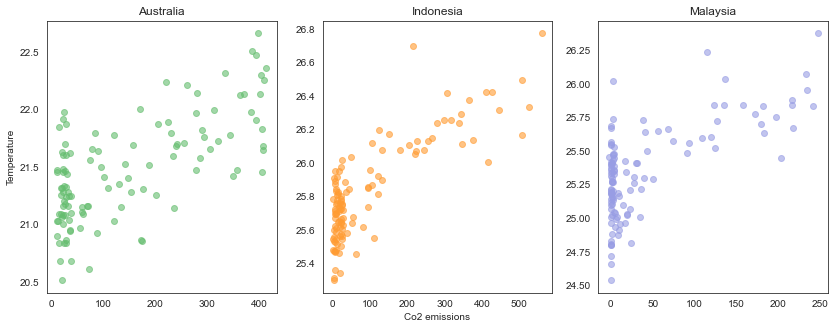

In [112]:
#Scatterplots of CO2 vs temp

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(14,5))
plt.grid=False
ax1.scatter(au_co2['Co2'], temp_merged['Au_avg_temp'], color='#64BD6E', alpha=0.6)
ax1.set_title('Australia')
ax1.set_ylabel('Temperature')
ax1.grid(False)

ax2.scatter(in_co2['Co2'], temp_merged['In_avg_temp'], color= '#FF9C33',alpha=0.6)
ax2.set_title('Indonesia')
ax2.set_xlabel('Co2 emissions')
ax2.grid(False)

ax3.scatter(ma_co2['Co2'],temp_merged['Ma_avg_temp'], color='#989DE4',alpha=0.6)
ax3.set_title('Malaysia')
ax3.grid(False)

plt.show()

<h2>Regression analysis 1960 -></h2>

In [113]:
#Using data from 1960s for more balance
temp_melt60s = temp_melt[temp_melt['Year'] >= 1960]
temp_merg60s = temp_merged[temp_merged['Year'] >= 1960]
co2_60s =co2_m[co2_m['Year'] >= 1960]
au_co2_60s = co2_60s[(co2_60s['Country']=='Australia') & (co2_60s['Year'] < 2017)]
in_co2_60s = co2_60s[(co2_60s['Country']=='Indonesia') & (co2_60s['Year'] < 2017)]
ma_co2_60s = co2_60s[(co2_60s['Country']=='Malaysia') & (co2_60s['Year'] < 2017)]

In [114]:
au_corr = np.corrcoef(au_co2_60s['Co2'],temp_merg60s['Au_avg_temp'])
in_corr = np.corrcoef(in_co2_60s['Co2'],temp_merg60s['In_avg_temp'])
ma_corr = np.corrcoef(ma_co2_60s['Co2'],temp_merg60s['Ma_avg_temp'])

In [115]:
#Correlations between the data from 1960s
print("Australia CO2 and temperature correlation 60s->", au_corr)
print("\nIndonesia CO2 and temperature correlation 60s->", in_corr)
print("\nMalaysia CO2 and temperature correlation 60s->", ma_corr)

Australia CO2 and temperature correlation 60s-> [[1.         0.63364651]
 [0.63364651 1.        ]]

Indonesia CO2 and temperature correlation 60s-> [[1.        0.8192061]
 [0.8192061 1.       ]]

Malaysia CO2 and temperature correlation 60s-> [[1.         0.81074495]
 [0.81074495 1.        ]]


In [116]:
#Easier data names
au_x2 = au_co2_60s['Co2']
au_y2 = temp_merg60s['Au_avg_temp']

in_x2 = in_co2_60s['Co2']
in_y2 = temp_merg60s['In_avg_temp']

ma_x2 = ma_co2_60s['Co2']
ma_y2 = temp_merg60s['Ma_avg_temp']

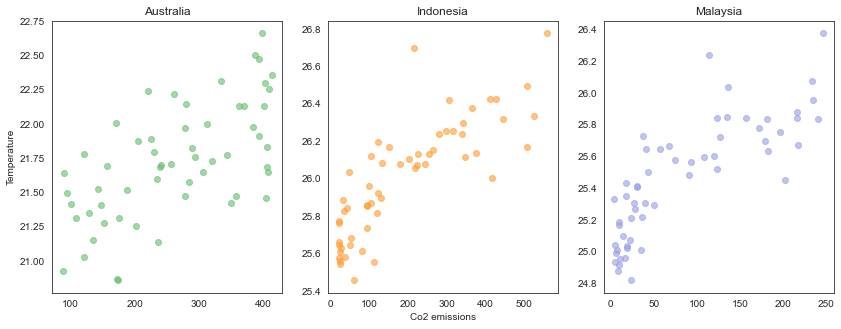

In [117]:
#CO2 emissions and temperatures on scatterplots from 1960s
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(14,5))
plt.grid=False
ax1.scatter(au_co2_60s['Co2'], temp_merg60s['Au_avg_temp'], color='#64BD6E', alpha=0.6)
ax1.set_title('Australia')
ax1.set_ylabel('Temperature')
ax1.grid(False)

ax2.scatter(in_co2_60s['Co2'], temp_merg60s['In_avg_temp'], color= '#FF9C33',alpha=0.6)
ax2.set_title('Indonesia')
ax2.set_xlabel('Co2 emissions')
ax2.grid(False)

ax3.scatter(ma_co2_60s['Co2'],temp_merg60s['Ma_avg_temp'], color='#989DE4',alpha=0.6)
ax3.set_title('Malaysia')
ax3.grid(False)

plt.show()

In [118]:
#R2 values
correlation_au = au_corr[0,1]
au_r2 = correlation_au**2
correlation_in = in_corr[0,1]
in_r2 = correlation_in**2
correlation_ma = ma_corr[0,1]
ma_r2 = correlation_ma**2

In [119]:
#R2 results; model captures around half of the temp variation
print(au_r2, in_r2, ma_r2)

0.40150790222137045 0.671098626604809 0.6573073729036305


In [120]:
#Counting stats for lin regr.

au_slope2, au_intercept2, au_r_value2, au_p_value2, au_std_err2 = stats.linregress(au_x2, au_y2)

print("Stats for Australia")
print ("Slope: ", au_slope2)
print ("Intercept: ", au_intercept2)
print("R2:", au_r2)
print ("P_value: ", au_p_value2)
print ("Std_err: ", au_std_err2)

in_slope2, in_intercept2, in_r_value2, in_p_value2, in_std_err2 = stats.linregress(in_x2, in_y2)

print("\nStats for Indonesia")
print ("Slope: ", in_slope2)
print ("Intercept: ", in_intercept2)
print("R2:", in_r2)
print ("P_value: ", in_p_value2)
print ("Std_err: ", in_std_err2)

ma_slope2, ma_intercept2, ma_r_value2, ma_p_value2, ma_std_err2 = stats.linregress(ma_x2, ma_y2)

print("\nStats for Malaysia")
print ("Slope: ", ma_slope2)
print ("Intercept: ", ma_intercept2)
print("R2:", ma_r2)
print ("P_value: ", ma_p_value2)
print ("Std_err: ", ma_std_err2)

Stats for Australia
Slope:  0.002521219294540596
Intercept:  21.06065215129948
R2: 0.40150790222137045
P_value:  1.2199049110569447e-07
Std_err:  0.00041506053257052384

Stats for Indonesia
Slope:  0.0016068432143728855
Intercept:  25.692945886932865
R2: 0.671098626604809
P_value:  6.792630330207392e-15
Std_err:  0.00015168122479007197

Stats for Malaysia
Slope:  0.0038089620994660837
Intercept:  25.137245978029032
R2: 0.6573073729036305
P_value:  2.1227203760330845e-14
Std_err:  0.00037084586005209797


In [121]:
#Creating the models
mdl_au= np.polyval([au_slope2, au_intercept2], au_x2)
mdl_in= np.polyval([in_slope2, in_intercept2], in_x2)
mdl_ma= np.polyval([ma_slope2, ma_intercept2], ma_x2)

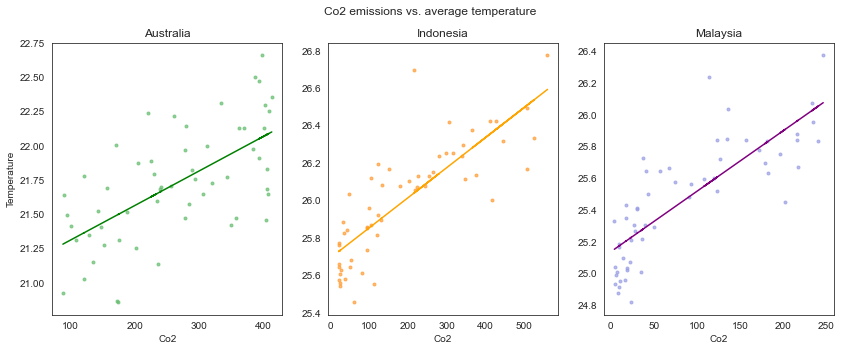

In [122]:
#Visualizing the 3 lin regr models
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(14,5))
plt.suptitle('Co2 emissions vs. average temperature')

ax1.scatter(au_x2,au_y2 , c = "#64BD6E", alpha = 0.7, linewidth=1, marker='.')
ax1.plot(au_x2, mdl_au, c='g')
ax1.set_title('Australia')
ax1.set_xlabel('Co2')
ax1.set_ylabel('Temperature')
ax1.grid(False)

ax2.scatter(in_x2,in_y2 , c = "#FF9C33", alpha = 0.7, linewidth=1, marker='.')
ax2.plot(in_x2, mdl_in, c='Orange')
ax2.set_title('Indonesia')
ax2.set_xlabel('Co2')
ax2.grid(False)

ax3.scatter(ma_x2,ma_y2 , c = "#989DE4", alpha = 0.7, linewidth=1, marker='.')
ax3.plot(ma_x2, mdl_ma, c='Purple')
ax3.set_title('Malaysia')
ax3.set_xlabel('Co2')
ax3.grid(False);

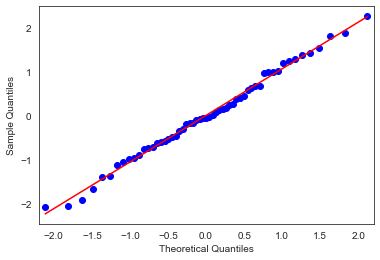

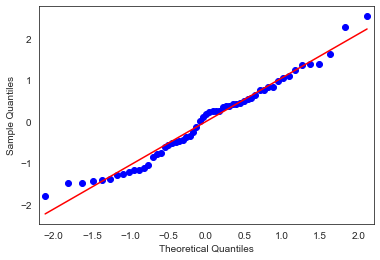

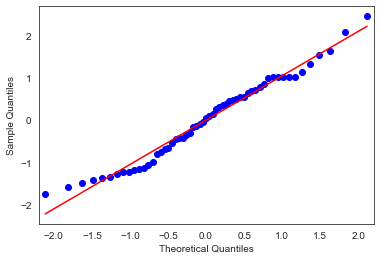

In [123]:
#Looking at the data distribution with qq-plots
sm.qqplot(au_y2, dist=stats.norm, fit=True, line = 'r')
sm.qqplot(in_y2, dist=stats.norm, fit=True, line = 'r')
sm.qqplot(ma_y2, dist=stats.norm, fit=True, line = 'r')

plt.show()

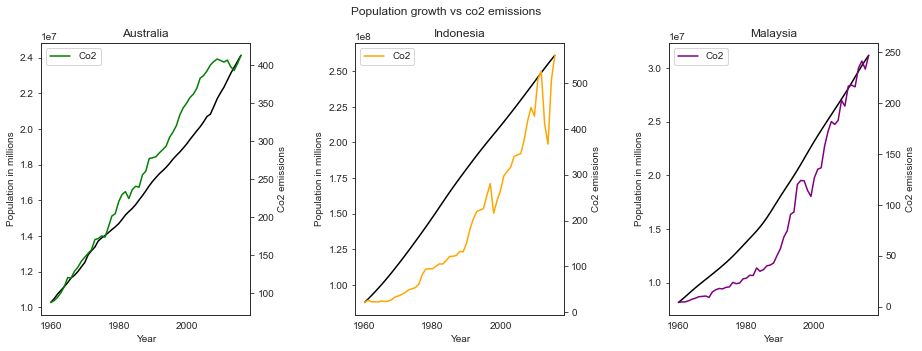

In [124]:
#Plotting population growth with CO2 emissions
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(15,5),)
plt.suptitle('Population growth vs co2 emissions')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
sns.set_style("white")

ax1.plot(pop_countries['Year'],pop_countries['Australia'],c='k')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population in millions')
ax1 = ax1.twinx()
ax1.plot(au_co2_60s['Year'],au_co2_60s['Co2'],c='g')
ax1.set_ylabel('Co2 emissions')
ax1.set_title('Australia')
ax1.set_xlabel('Co2')
ax1.legend(['Co2'])
ax1.grid(False);

ax2.plot(pop_countries['Year'],pop_countries['Indonesia'],c='k')
ax2.set_xlabel('Year')
ax2.set_ylabel('Population in millions')
ax2 = ax2.twinx()
ax2.plot(in_co2_60s['Year'],in_co2_60s['Co2'], c='Orange')
ax2.set_ylabel('Co2 emissions')
ax2.set_title('Indonesia')
ax2.set_xlabel('Co2')
ax2.legend(['Co2'])
ax2.grid(False);

ax3.plot(pop_countries['Year'],pop_countries['Malaysia'],c='k')
ax3.set_xlabel('Year')
ax3.set_ylabel('Population in millions')
ax3 = ax3.twinx()
ax3.plot(ma_co2_60s['Year'],ma_co2_60s['Co2'], c='purple')
ax3.set_ylabel('Co2 emissions')
ax3.set_title('Malaysia')
ax3.legend(['Co2'])
ax3.grid(False);

<h4>Correlation heatmap</h4>

In [125]:
#Creating a new df including population
temp_co_pop= temp_merg60s.merge(au_co2_60s,on=['Year'])
temp_co_pop= temp_co_pop.merge(in_co2_60s,on=['Year'])
temp_co_pop= temp_co_pop.merge(ma_co2_60s,on=['Year'])
temp_co_pop= temp_co_pop.merge(pop_countries,on='Year')

In [126]:
temp_co_pop.head(3)

,Year,Au_avg_temp,In_avg_temp,Ma_avg_temp,Country_x,Co2_x,Country_y,Co2_y,Country,Co2,Australia,Indonesia,Malaysia
0,1960,20.925992,25.759892,25.330283,Australia,88.119,Indonesia,21.385,Malaysia,4.201,10276477.0,87792515.0,8157106.0
1,1961,21.639133,25.606867,25.043058,Australia,90.504,Indonesia,26.002,Malaysia,4.685,10483000.0,90138235.0,8418460.0
2,1962,21.498942,25.574375,24.935500,Australia,94.823,Indonesia,22.975,Malaysia,4.777,10742000.0,92558005.0,8692815.0


In [127]:
temp_co_pop.drop(columns='Year',inplace=True)

In [128]:
#Renaming columns
temp_co_pop.rename(columns={'Co2_x':'Au_CO2_emissions','Co2_y':'In_CO2_emissions','Co2':'Ma_CO2_emissions',
                           'Australia':'Au_population','Indonesia':'In_population','Malaysia':'Ma_population'},inplace=True)

In [129]:
#Rearanging df
temp_co_pop = temp_co_pop[['Au_avg_temp', 'Au_CO2_emissions','Au_population',
                           'In_avg_temp', 'In_CO2_emissions','In_population',
                           'Ma_avg_temp', 'Ma_CO2_emissions','Ma_population',]]

In [130]:
normalized_df=(temp_co_pop-temp_co_pop.min())/(temp_co_pop.max()-temp_co_pop.min())

In [131]:
Corr_norm = normalized_df.corr()
print(Corr_norm)

                  Au_avg_temp  Au_CO2_emissions  Au_population  In_avg_temp  \
Au_avg_temp          1.000000          0.633647       0.640765     0.736698   
Au_CO2_emissions     0.633647          1.000000       0.986200     0.846968   
Au_population        0.640765          0.986200       1.000000     0.855656   
In_avg_temp          0.736698          0.846968       0.855656     1.000000   
In_CO2_emissions     0.578392          0.944956       0.963982     0.819206   
In_population        0.642631          0.994410       0.996499     0.857448   
Ma_avg_temp          0.711000          0.850787       0.852744     0.983759   
Ma_CO2_emissions     0.609217          0.936311       0.959210     0.818486   
Ma_population        0.637890          0.984455       0.994253     0.856982   

                  In_CO2_emissions  In_population  Ma_avg_temp  \
Au_avg_temp               0.578392       0.642631     0.711000   
Au_CO2_emissions          0.944956       0.994410     0.850787   
Au_populati

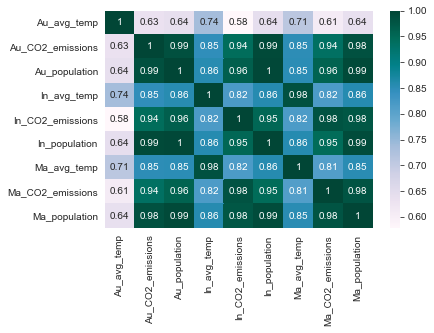

In [132]:
sns.heatmap(Corr_norm, annot=True,cmap='PuBuGn');
plt.yticks(rotation=0);

In [133]:
#Correlation matrix
CorrMatrix = temp_co_pop.corr()
print (CorrMatrix)

                  Au_avg_temp  Au_CO2_emissions  Au_population  In_avg_temp  \
Au_avg_temp          1.000000          0.633647       0.640765     0.736698   
Au_CO2_emissions     0.633647          1.000000       0.986200     0.846968   
Au_population        0.640765          0.986200       1.000000     0.855656   
In_avg_temp          0.736698          0.846968       0.855656     1.000000   
In_CO2_emissions     0.578392          0.944956       0.963982     0.819206   
In_population        0.642631          0.994410       0.996499     0.857448   
Ma_avg_temp          0.711000          0.850787       0.852744     0.983759   
Ma_CO2_emissions     0.609217          0.936311       0.959210     0.818486   
Ma_population        0.637890          0.984455       0.994253     0.856982   

                  In_CO2_emissions  In_population  Ma_avg_temp  \
Au_avg_temp               0.578392       0.642631     0.711000   
Au_CO2_emissions          0.944956       0.994410     0.850787   
Au_populati

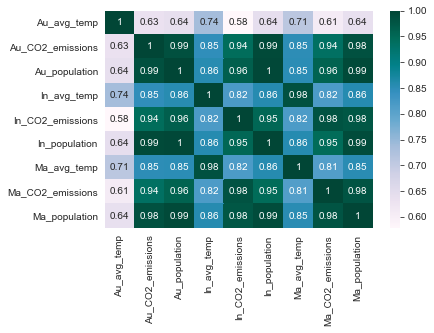

In [134]:
#Heatmap of correlations
sns.heatmap(CorrMatrix, annot=True,cmap='PuBuGn');
plt.yticks(rotation=0);

<h4>Preparing data for trendlines(Australia first)</h4>

In [135]:
temp_Au.head()

,Year,Au_avg_temp
0,1901,21.455033
12,1902,21.469917
24,1903,21.027600
36,1904,20.896942
48,1905,21.026083


In [136]:
temp_Au.isnull().sum()

Year           0
Au_avg_temp    0
dtype: int64

In [137]:
temp_Au = temp_Au.reset_index(drop=True)

In [138]:
temp_Au['Year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

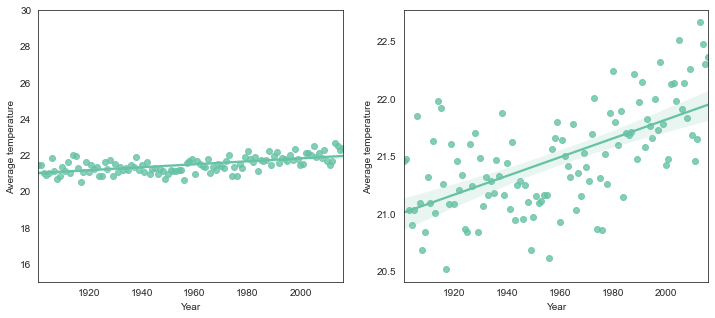

In [139]:
#Looking at temperature changes more closely; not used in the report
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,5))
sns.regplot(x='Year', y='Au_avg_temp', ax=ax1, data=temp_Au)
sns.regplot(x='Year', y='Au_avg_temp', ax=ax2, data=temp_Au)
ax1.set(ylim=(15,30))
ax1.set_ylabel("Average temperature")
ax2.set_ylabel("Average temperature");

In [140]:
#Fixing data for Australia; selecting data from 2003 onwards
temp_Au2003 = temp_Au[temp_Au['Year'] > 2002]

In [141]:
co2_Au2003 = au_co2[au_co2['Year']>2002]

In [142]:
co2_Au2003 = co2_Au2003.reset_index(drop=True)

In [143]:
au_temp_co2= temp_Au2003.merge(co2_Au2003, on='Year')

In [144]:
au_bleaching = df[(df['Country']== 'Australia') & (df['Year']< 2017)]

In [145]:
au_bleaching = au_bleaching.reset_index(drop=True)

In [146]:
au_bleaching.head()

,Year,Date,Country,Average_Bleaching_percent,Depth_m,Realm,Ocean,Ecoregion
0,2016,2016-04-17,Australia,72.50,3.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
1,2015,2015-09-12,Australia,67.50,3.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
2,2016,2016-04-17,Australia,60.00,5.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
3,2016,2016-04-17,Australia,58.75,4.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
4,2016,2016-06-25,Australia,57.50,3.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef


In [147]:
#Fixing the dataframe to contain the mean bleaching values
au_bleaching['Average_Bleaching_percent'] = au_bleaching.groupby('Year')['Average_Bleaching_percent'].transform('mean')

In [148]:
au_bleaching = au_bleaching.drop_duplicates('Year')

In [149]:
au_bleaching.head(3)

,Year,Date,Country,Average_Bleaching_percent,Depth_m,Realm,Ocean,Ecoregion
0,2016,2016-04-17,Australia,10.574176,3.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
1,2015,2015-09-12,Australia,9.475806,3.0,Central Indo-Pacific,Pacific,Central and northern Great Barrier Reef
7,2013,2013-12-19,Australia,3.450758,2.0,Temperate Australasia,Pacific,"Moreton Bay, eastern Australia"


In [150]:
au_bleaching['Year'].unique()

array([2016, 2015, 2013, 2014, 2009, 2012, 2006, 2010, 2004, 2003, 2005,
       2008, 2011, 2007], dtype=int64)

In [151]:
au_temp_co2['Year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

In [152]:
au_bleaching.isnull().sum()

Year                         0
Date                         0
Country                      0
Average_Bleaching_percent    0
Depth_m                      0
Realm                        0
Ocean                        0
Ecoregion                    0
dtype: int64

<h2>Trendlines</h2>

In [170]:
au_bleaching.sort_values(by=['Year'],inplace=True)

<h4>Australia</h4>

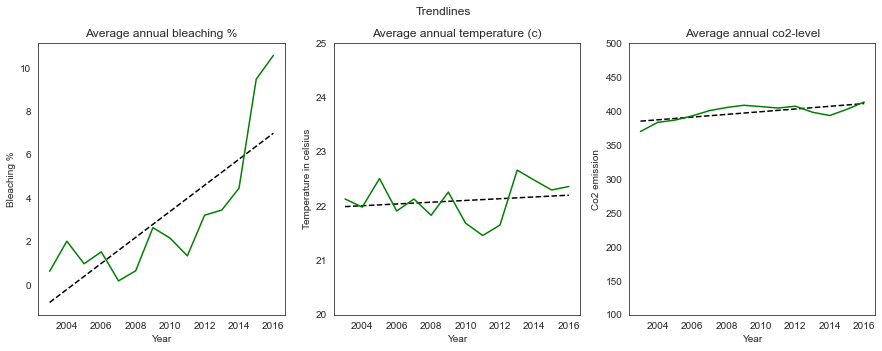

In [171]:
#Creating trendlines for coral bleaching, temperatures, CO2 emissions. We use data from 2003 onwards to have
#the same data frame for the metrics.
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Trendlines')

x, y=au_bleaching['Year'],au_bleaching['Average_Bleaching_percent']
x1, y1=au_temp_co2['Year'],au_temp_co2['Au_avg_temp']
x2, y2=au_temp_co2['Year'],au_temp_co2['Co2']
#1st plot
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"k--")
ax1.plot(x, y,"Green")
ax1.set_xlabel("Year")
ax1.set_ylabel("Bleaching %")
ax1.set_title('Average annual bleaching %')
#2nd plot
z = np.polyfit(x1,y1, 1)
p = np.poly1d(z)
ax2.plot(x1,p(x1),"k--")
ax2.plot(x1, y1,"Green")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature in celsius")
ax2.set_ylim([20,25])
ax2.set_title('Average annual temperature (c)')
#3rd plot
z = np.polyfit(x2,y2, 1)
p = np.poly1d(z)
ax3.plot(x2,p(x2),"k--")
ax3.plot(x2, y2,"Green")
ax3.set_xlabel("Year")
ax3.set_ylabel("Co2 emission")
ax3.set_ylim([100,500])
ax3.set_title('Average annual co2-level');

<h4>Malaysia</h4>

In [154]:
#Selecting data from 2003 onwards
temp_Ma2003 = temp_Ma[temp_Ma['Year'] > 2002]
co2_Ma2003 = ma_co2[ma_co2['Year']>2002]
co2_Ma2003 = co2_Ma2003.reset_index(drop=True)
ma_temp_co2= temp_Ma2003.merge(co2_Ma2003, on='Year')

In [155]:
ma_temp_co2.head(3)

,Year,Ma_avg_temp,Country,Co2
0,2003,25.843900,Malaysia,157.266
1,2004,25.777500,Malaysia,171.695
2,2005,25.838217,Malaysia,181.755


In [156]:
#Fixing the dataframe to contain the mean bleaching values
ma_bleaching = df[(df['Country']== 'Malaysia') & (df['Year']< 2017)]
ma_bleaching = ma_bleaching.reset_index(drop=True)
ma_bleaching['Average_Bleaching_percent'] = ma_bleaching.groupby('Year')['Average_Bleaching_percent'].transform('mean')
ma_bleaching = ma_bleaching.drop_duplicates('Year')

In [168]:
ma_bleaching.sort_values(by=['Year'],inplace=True)

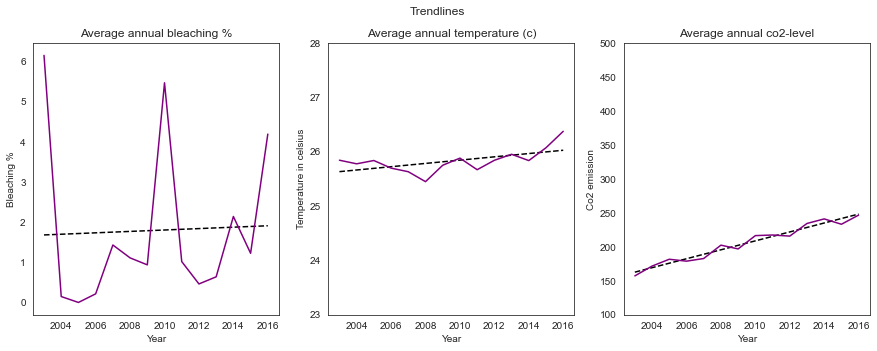

In [169]:
#Trendlines for Malaysia
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Trendlines')

x, y=ma_bleaching['Year'],ma_bleaching['Average_Bleaching_percent']
x1, y1=ma_temp_co2['Year'],ma_temp_co2['Ma_avg_temp']
x2, y2=ma_temp_co2['Year'],ma_temp_co2['Co2']
#1st plot
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"k--")
ax1.plot(x, y,"Purple")
ax1.set_xlabel("Year")
ax1.set_ylabel("Bleaching %")
ax1.set_title('Average annual bleaching %')
#2nd plot
z1 = np.polyfit(x1,y1, 1)
p1 = np.poly1d(z1)
ax2.plot(x1,p1(x1),"k--")
ax2.plot(x1, y1,"Purple")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature in celsius")
ax2.set_ylim([23,28])
ax2.set_title('Average annual temperature (c)')
#3rd plot
z2 = np.polyfit(x2,y2, 1)
p2 = np.poly1d(z2)
ax3.plot(x2,p2(x2),"k--")
ax3.plot(x2, y2,"Purple")
ax3.set_xlabel("Year")
ax3.set_ylabel("Co2 emission")
ax3.set_ylim([100,500])
ax3.set_title('Average annual co2-level');

<h4>Indonesia</h4>

In [159]:
#Selecting data from 2003 onwards
temp_In2003 = temp_In[temp_In['Year'] > 2002]
co2_In2003 = in_co2[in_co2['Year']>2002]
co2_In2003 = co2_In2003.reset_index(drop=True)
in_temp_co2= temp_In2003.merge(co2_In2003, on='Year')

In [160]:
#Fixing the dataframe to contain the mean bleaching values
in_bleaching = df[(df['Country']== 'Indonesia') & (df['Year']< 2017)]
in_bleaching = in_bleaching.reset_index(drop=True)
in_bleaching['Average_Bleaching_percent'] = in_bleaching.groupby('Year')['Average_Bleaching_percent'].transform('mean')
in_bleaching = in_bleaching.drop_duplicates('Year')

In [161]:
in_temp_co2.head(3)

,Year,In_avg_temp,Country,Co2
0,2003,26.256092,Indonesia,316.655
1,2004,26.237042,Indonesia,339.848
2,2005,26.296117,Indonesia,343.336


In [166]:
in_bleaching.sort_values(by=['Year'],inplace=True)

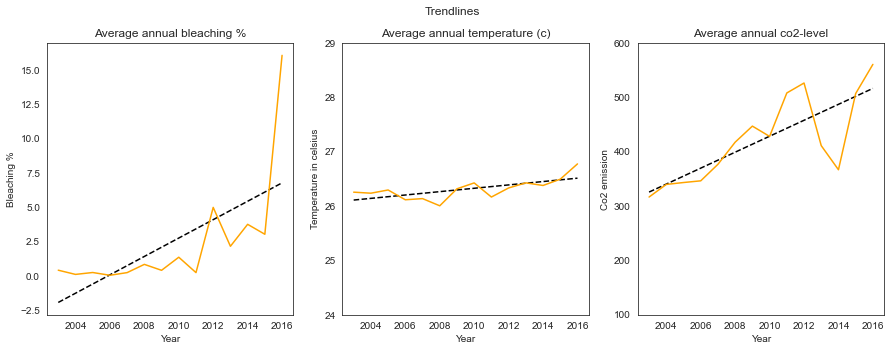

In [167]:
#Creating trendlines for Indonesia
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Trendlines')

x, y=in_bleaching['Year'],in_bleaching['Average_Bleaching_percent']
x1, y1=in_temp_co2['Year'],in_temp_co2['In_avg_temp']
x2, y2=in_temp_co2['Year'],in_temp_co2['Co2']
#1st plot
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"k--")
ax1.plot(x, y,"Orange")
ax1.set_xlabel("Year")
ax1.set_ylabel("Bleaching %")
ax1.set_title('Average annual bleaching %')
#2nd plot
z1 = np.polyfit(x1,y1, 1)
p1 = np.poly1d(z1)
ax2.plot(x1,p1(x1),"k--")
ax2.plot(x1, y1,"Orange")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature in celsius")
ax2.set_ylim([24,29])
ax2.set_title('Average annual temperature (c)')
#3rd plot
z2 = np.polyfit(x2,y2, 1)
p2 = np.poly1d(z2)
ax3.plot(x2,p2(x2),"k--")
ax3.plot(x2, y2,"Orange")
ax3.set_xlabel("Year")
ax3.set_ylabel("Co2 emission")
ax3.set_ylim([100,600])
ax3.set_title('Average annual co2-level');